## 0. Download dataset
**Note:** If you can't download using gdown due to limited number of downloads, please download it manually and upload it to your drive, then copy it from the drive to colab.
```python
from google.colab import drive

drive.mount('/content/drive')
!cp /path/to/dataset/on/your/drive .
```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## 2. Load dataset

In [3]:
dataset_path = '/content/drive/Othercomputers/My Laptop/Advanced/Exercises/230917 - XGBoost Solution - TA_Khoa/Problem4.csv'
data_df = pd.read_csv(dataset_path)
data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
data_df.shape

(178, 14)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

## 3. Dealing with categorical data


### 3.1. Check categorical data

In [6]:
categorical_cols = data_df.select_dtypes(include=['object', 'bool']).columns.to_list()
categorical_cols

[]

In [7]:
for col_name in categorical_cols:
    n_categories = data_df[col_name].nunique()
    print(f'Number of categories in {col_name}: {n_categories}')

## 4. Train test split

In [8]:
X, y = data_df.iloc[:,:-1],data_df.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


In [10]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_test.shape[0]}')

Number of training samples: 124
Number of val samples: 54


## 5. Training

In [11]:
xg_class = xgb.XGBClassifier(seed=7)


In [12]:
xg_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## 6. Evaluation

In [13]:
preds = xg_class.predict(X_test)

In [14]:
train_acc = accuracy_score(y_train, xg_class.predict(X_train))
test_acc = accuracy_score(y_test, preds)

print(f'Train ACC: {train_acc}')
print(f'Test ACC: {test_acc}')

Train ACC: 1.0
Test ACC: 0.9629629629629629


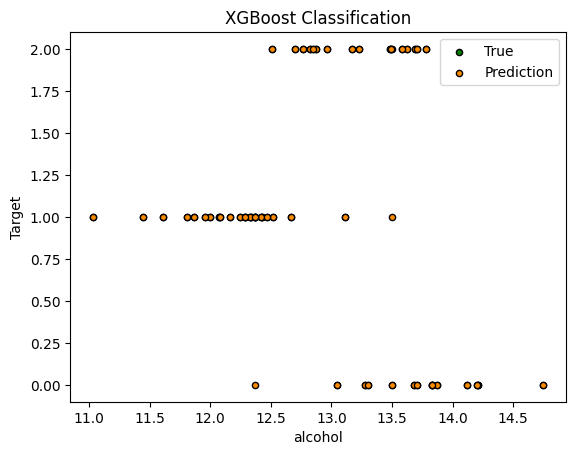

In [15]:
plt.figure()
plt.scatter(X_test['alcohol'], y_test, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_test['alcohol'], preds, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("alcohol")
plt.ylabel("Target")
plt.title("XGBoost Classification")
plt.legend()
plt.show()